***
***
***
<h1>A3: Timed Unsupervised Learning Project</h1>

<br>
<b>
    Data Analysis and Code<br>
    MBAN: Hult International Business School<br>
    DAT-5303 | Machine Learning</b><br>
<b>Team 6 - FMSBA6:</b>


* Fangxiao Wu
* J. Eduardo Aguilar
* Punyisa Kraisang
* Skander Driss
* Tuba Ali
* Ye Liu

***
***
***
<h3>Business Objectives</h3>
<br>
Countless consumers have pondered whether to buy Windows or Mac when preparing to buy a new computer. As a result, Apple (AAPL) and our company - Microsoft (MSFT) - have been rigorously researching several aspects of consumer buying behavior in regards to the decision making behind this question. 

Recently, the company has decided to approach this question from the perspective of the <a href='https://www.123test.com/big-five-personality-theory/'>Big Five personality traits</a> as well as the <a href='https://www.hult.edu/blog/why-every-leader-needs-growth-mindset/'>Hult DNA</a>. As such, we conducted a <a href='https://docs.google.com/forms/d/e/1FAIpQLSfCKEKUKXPYErVtQI-NWnh4XlKcrxzuW5iXbtUoQtAADbHw3Q/viewform'><i>survey</i></a> and ran an analysis on these factors. <br>

The file contains:

* Exploratory data analysis
* Feature treatment and engineering
* Utilizing unsupervised clustering model

***

<h2>Step 0: Libraries & Environment Setup</h2>
<br>

***

<h3>Importing Packages</h3>

In [1]:
# Import libraries
import matplotlib.pyplot as plt                         # For essential graphical output
import numpy             as np                          # For array-processing
import pandas            as pd                          # For data science essentials
import seaborn           as sns                         # For enhanced graphical output

from sklearn.model_selection import train_test_split    # For train/test split
from sklearn.preprocessing   import StandardScaler      # For scaling
from sklearn.decomposition   import PCA                 # For pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

import warnings                                         # Warning Controls



# Set pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Removing warnings
warnings.filterwarnings("ignore")

# Set file path
file_path = 'Survey_Data_Final_Exam.xlsx'

<br><strong>Adjusting Table Style</strong>

In [2]:
%%html
<!-- Set table style -->
<style>
    table.question_list {
        float:left;
        width: 90%
    }
    
    table.question_list tr{
        border: None;
        text-align: left;
        background-color: white;
    }
    
    table.question_list th{
        border: None;
        text-align: left;
        background-color: white;
    }
    
    table.question_list td{
        border: None;
        text-align: left;
        background-color: white;
    }
</style>

<h3>User Defined Functions</h3>
<br>
Run the following code to load the user-defined functions used throughout this Notebook.

In [3]:
# get_redundant_pairs
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


# get_top_abs_correlations
def get_top_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[au_corr >= 0.5]


# scree_plot
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(12, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()
    

# inertia_plot
def inertia_plot(data, max_clust = 50):
    """
    PARAMETERS
    ----------
    data      : DataFrame, data from which to build clusters. Dataset should be scaled
    max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


<h2>Step I: Import & Fundamental Dataset Exploration</h2>
<h3>Import dataset</h3>

In [4]:
# Get dataset
original_surveys = pd.read_excel(file_path)

# Copy dataset and work on it instead to prevent editing original dataset 
surveys = original_surveys.copy()

<h3>Explore dataset</h3>

In [5]:
# Investigate column names
#print(f'Column Names: \n{surveys.columns}\n\n')

# Get example of dataset
print('Example of survey:')
surveys.head(5)

Example of survey:


,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?
0,a1000,4,3,4,3,4,2,3,2,3,2,2,1,5,4,4,4,4,2,2,3,4,3,4,2,3,2,4,2,2,3,3,2,5,4,4,3,3,2,3,3,3,3,4,2,4,3,3,4,2,3,4,2,4,4,4,4,4,4,4,4,4,3,4,4,4,2,4,4,4,4,4,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino
1,a1001,2,4,3,4,3,3,2,3,4,2,3,1,4,4,5,3,4,2,4,2,3,5,3,4,4,3,4,2,1,1,2,2,5,4,4,4,4,3,2,2,2,3,5,4,5,4,5,5,3,4,4,2,2,4,4,4,5,5,5,5,5,2,4,4,2,3,4,5,5,4,5,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino
2,a1002,4,4,5,1,4,3,2,2,5,1,3,3,5,1,2,3,2,1,5,4,3,4,4,3,3,2,3,2,2,2,4,3,1,2,5,4,3,2,1,2,5,3,4,4,2,3,3,3,1,4,3,2,5,3,5,2,3,5,2,3,3,2,3,4,4,2,4,2,3,3,5,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian
3,a1003,4,5,3,3,3,3,5,3,5,4,3,1,4,4,5,5,5,3,3,3,4,2,3,1,5,4,5,2,2,1,3,3,3,4,3,3,4,3,4,3,2,5,3,5,5,3,5,3,3,5,3,3,3,5,5,5,4,4,4,4,5,3,5,5,5,5,3,5,5,5,5,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian
4,a1004,5,4,4,4,3,3,3,3,3,3,3,3,3,4,5,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,4,4,4,4,4,3,3,3,3,4,4,3,3,3,5,3,3,3,3,3,3,4,4,4,3,3,4,4,3,3,3,3,3,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian


From example of the dataset, we can see that:

* Each row represents each survey respondents, while columns represent each question in the survey. 
* We can divide the survey questions into 3 sections
    * Big Five Personality Traits
    * Hult DNA 
    * Demographic information of respondents, containing personal information and their computer's preference

***
<h4>Survey Questions</h4>
<br>
The following are the survey questions based on sections:

**Big Five**
<table class='question_list'>
    <tr><td>1. Am the life of the party</td>       <td>27. Have a soft heart</td></tr>
    <tr><td>2. Feel little concern for others</td> <td>28. Often forget to put things back in their proper place</td></tr>
    <tr><td>3. Am always prepared</td>             <td>29. Get upset easily</td></tr>
    <tr><td>4. Get stressed out easily</td>        <td>30. Do not have a good imagination</td></tr>
    <tr><td>5. Have a rich vocabulary</td>         <td>31. Talk to a lot of different people at parties</td></tr>
    <tr><td>6. Don't talk a lot</td>               <td>32. Am not really interested in others</td></tr>
    <tr><td>7. Am interested in people</td>        <td>33. Like order</td></tr>
    <tr><td>8. Leave my belongings around</td>     <td>34. Change my mood a lot</td></tr>
    <tr><td>9. Am relaxed most of the time</td>    <td>35. Am quick to understand things</td></tr>
    <tr><td>10. Have difficulty understanding abstract ideas</td><td>36. Don't like to draw attention to myself</td></tr>
    <tr><td>11. Feel comfortable around people</td><td>37. Take time out for others</td></tr>
    <tr><td>12. Insult people</td>                 <td>38. Shirk my duties</td></tr>
    <tr><td>13. Pay attention to details</td>      <td>39. Have frequent mood swings</td></tr>
    <tr><td>14. Worry about things</td>            <td>40. Use difficult words</td></tr>
    <tr><td>15. Have a vivid imagination</td>      <td>41. Don't mind being the center of attention</td></tr>
    <tr><td>16. Keep in the background</td>        <td>42. Feel others' emotions</td></tr>
    <tr><td>17. Sympathize with others' feelings</td><td>43. Follow a schedule</td></tr>
    <tr><td>18. Make a mess of things</td>         <td>44. Get irritated easily</td></tr>
    <tr><td>19. Seldom feel blue</td>              <td>45. Spend time reflecting on things</td></tr>
    <tr><td>20. Am not interested in abstract ideas</td><td>46. Am quiet around strangers</td></tr>
    <tr><td>21. Start conversations</td>           <td>47. Make people feel at ease</td></tr>
    <tr><td>22. Am not interested in other people's problems</td><td>48. Am exacting in my work</td></tr>
    <tr><td>23. Get chores done right away</td>    <td>49. Often feel blue</td></tr>
    <tr><td>24. Am easily disturbed</td>           <td>50. Am full of ideas</td></tr>
    <tr><td>25. Have excellent ideas</td>          <td></td></tr>
    <tr><td>26. Have little to say</td>            <td></td></tr>
</table>

**Hult DNA**
<table class='question_list'>
    <tr><td>51. See underlying patterns in complex situations</td></tr>
    <tr><td>52. Don't  generate ideas that are new and different</td></tr>
    <tr><td>53. Demonstrate an awareness of personal strengths and limitations</td></tr>
    <tr><td>54. Display a growth mindset</td></tr>
    <tr><td>55. Respond effectively to multiple priorities</td></tr>
    <tr><td>56. Take initiative even when circumstances, objectives, or rules aren't clear</td></tr>
    <tr><td>57. Encourage direct and open discussions</td></tr>
    <tr><td>58. Respond effectively to multiple priorities</td></tr>
    <tr><td>59. Take initiative even when circumstances, objectives, or rules aren't clear</td></tr>
    <tr><td>60. Encourage direct and open discussions</td></tr>
    <tr><td>61. Listen carefully to others</td></tr>
    <tr><td>62. Don't persuasively sell a vision or idea</td></tr>
    <tr><td>63. Build cooperative relationships</td></tr>
    <tr><td>64. Work well with people from diverse cultural backgrounds</td></tr>
    <tr><td>65. Effectively negotiate interests, resources, and roles</td></tr>
    <tr><td>66. Can't rally people on the team around a common goal</td></tr>
    <tr><td>67. Translate ideas into plans that are organized and realistic</td></tr>
    <tr><td>68. Resolve conflicts constructively</td></tr>
    <tr><td>69. Seek and use feedback from teammates</td></tr>
    <tr><td>70. Coach teammates for performance and growth</td></tr>
    <tr><td>71. Drive for results</td></tr>
</table>

**Demographic**
<table class='question_list'>
    <tr><td>72. What laptop do you currently have?</td></tr>
    <tr><td>73. What laptop would you buy in next assuming if all laptops cost the same?</td></tr>
    <tr><td>74. What program are you in?</td></tr>
    <tr><td>75. What is your age?</td></tr>
    <tr><td>76. Gender</td></tr>
    <tr><td>77. What is your nationality? </td></tr>
    <tr><td>78. What is your ethnicity?</td></tr>
</table>

***
<h4>Survey Question Analysis</h4>

In [6]:
# Investigate data types of each variables
#surveys.info()

# Investigate descrptive information of each questions
surveys.describe().round(3)

,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What is your age?
count,392.000,392.00,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000
mean,2.939,2.76,3.569,2.906,3.311,2.898,3.832,2.434,3.304,2.406,3.648,1.735,4.087,3.589,3.982,3.112,4.112,2.319,2.890,2.128,3.378,2.449,3.288,2.758,3.860,2.602,3.773,2.316,2.487,2.112,2.913,2.268,3.819,2.773,3.906,3.217,3.673,2.324,2.497,2.704,3.013,3.936,3.689,2.582,3.921,3.426,3.883,3.768,2.480,3.793,3.918,2.360,4.003,4.143,3.952,3.855,4.031,4.023,3.890,4.010,4.038,2.806,4.120,4.263,3.944,2.508,3.913,3.941,4.059,3.763,4.276,27.339
std,1.118,1.31,0.891,1.226,0.952,1.142,0.990,1.355,1.093,1.097,0.995,0.963,0.830,1.127,0.934,1.008,0.860,1.081,1.042,1.016,1.009,1.069,1.027,1.117,0.749,1.046,1.062,1.187,1.164,1.091,1.125,1.018,0.999,1.132,0.910,1.165,0.930,1.016,1.205,1.048,1.202,0.972,1.034,1.153,0.950,1.101,0.791,0.884,1.068,0.879,0.821,1.051,0.779,0.774,0.806,0.906,0.809,0.724,0.879,0.793,0.813,1.031,0.759,0.682,0.768,1.101,0.788,0.725,0.802,0.877,0.747,5.340
min,1.000,1.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1

As we explore on each questions' descriptive information, we see that the questions are in 1-5 scale (i.e. Likert scale). The questions ask respondents' opinion on how they describe themselves based on the questions. Each scale will stand for:
    1. Very Inaccurate
    2. Moderately Inaccurate
    3. Neither Accurate Nor Inaccurate
    4. Moderately Accurate
    5. Very Accurate
    
We will <strong>assume</strong> that all respondents understand the questions correctly and interpret them in the same way. It is because we cannot detect and control how they translate the question. For example:
* Question 29, "get upset easily", some people might interpret "upset" as a feeling angry, while the others might interpret it as feeling uneasy and troubled. 
* Question 2, "feel little concern for others", the word "little" can be interpreted differently by each individual.


<br><strong>In addition,</strong> some people tend to avoid answering questions in extreme behaviors. They might not choose "very inaccurate" or "vary accurate"options. <strong>Furthermore,</strong> the sense of choosing between "moderately" and "very" are also different based on people. Each individual have different scaling. Let's see if we have these people in our dataset.

***
<h4>Respondents' Answers Analysis</h4>
<br>Checking out surveyees which is avoid to answer questions with extreme options such as "1" or "5" 

In [7]:
# Get descriptive information on each respondents' answers
q_desc = surveys.iloc[:, 1:72].T.describe().round(2).T

# Filter only respondent that did not answer 1 and 5
print('Respondents that did not answer 1 and 5:')
q_desc[((q_desc['min']!= 1) & (q_desc['max']!= 5))]

Respondents that did not answer 1 and 5:


,count,mean,std,min,25%,50%,75%,max
54,71.0,3.06,0.69,2.0,3.0,3.0,4.0,4.0
101,71.0,3.17,0.68,2.0,3.0,3.0,4.0,4.0
202,71.0,3.06,0.69,2.0,3.0,3.0,4.0,4.0
249,71.0,3.17,0.68,2.0,3.0,3.0,4.0,4.0
361,71.0,3.49,0.77,2.0,3.0,4.0,4.0,4.0


Only <strong>5 respondents</strong> show this characteristic. We could consider flag these respondents as <strong>non-extreme surveyees.</strong> Nevertheless, the sample size is too small comparing to the entire sample size, and it is also possible that the surveyees really observed themselves as non-extreme. Plus, we do not have a way to distinguish these two cases because of lag of information. 

Below shows a histogram of standard deviation of respondents. The distribution is <strong>almost bell-curved</strong> as the answers are almost normally distributed. As such, we decide to leave the non-extreme respondents here without flag.

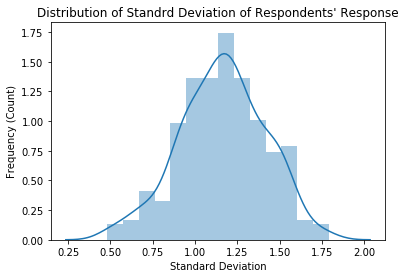

In [8]:
# Plot the histrogram of stardard deviation of each repondents' anwers
plt.figure()
sns.distplot(q_desc['std'],
             kde = True)
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency (Count)')
plt.title("Distribution of Standrd Deviation of Respondents' Response")

# Show the plot
plt.show()

In any case, based on the question lists, we notice that some questions might <strong>relate</strong> to each other. For example:
    6. Don't talk a lot
    26. Have little to say
<strong>and</strong>
    10. Have difficulty understanding abstract ideas
    15. Have a vivid imagination
    20. Am not interested in abstract ideas
    30. Do not have a good imagination

Some questions are <strong>opposite</strong> to each other. For example:
    19. Seldom feel blue
    49. Often feel blue

Some questions are <strong>duplicated</strong>. For example:
    55. Respond effectively to multiple priorities
    58. Respond effectively to multiple priorities
<strong>and</strong>
    56. Take initiative even when circumstances, objectives, or rules aren't clear
    59. Take initiative even when circumstances, objectives, or rules aren't clear
<strong>and</strong>
    57. Encourage direct and open discussions
    60. Encourage direct and open discussions

Some questions are <strong>negative</strong> sentences that we can <strong><u>reverse</u></strong>. For example:
    6. Don't talk a lot
    20. Am not interested in abstract ideas
    22. Am not interested in other people's problems
    30. Do not have a good imagination
    36. Don't like to draw attention to myself
    62. Don't persuasively sell a vision or idea
    66. Can't rally people on the team around a common goal

As observed, we gain overall idea on how we should handle these variations of data. We will talk about this in detail in the next section. 
<br>In the next section:
* Try reverse the scale of the negative question in order to make all questions consistent,

* Discuss a solution for intended duplicated columns.

***
<h4>Demographics Analysis</h4>
<br>
Earlier, we only discuss on the Big Five and Hult DNA questions. Let's we focus on Demographic responses.

In [9]:
# Get example of demographic question's answer
print('Example of Demographic response:')
surveys.iloc[:, 72:79].head(5)

Example of Demographic response:


,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?
0,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino
1,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino
2,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian
3,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian


<br><h5>Laptops</h5>

Checking out current and future laptops.

In [10]:
# Inspect current laptop
print(surveys.iloc[:, 72].value_counts(), '\n')

# Inspect future laptop
print(surveys.iloc[:, 73].value_counts())

Macbook           199
Windows laptop    192
MAC                 1
Name: What laptop do you currently have?, dtype: int64 

Macbook           218
Windows laptop    163
Chromebook         10
MAC                 1
Name: What laptop would you buy in next assuming if all laptops cost the same?, dtype: int64


From the value counts, we see that there are two duplicated values of Mac laptops - Macbook and MAC. However, if we check the survey, we will find that there is <strong>no choice for 'MAC'.</strong> Later we might consider <u>remove this respondent because it is likely a data error.</u>

<h5>Programs</h5>

Checking out program types and counts.

In [11]:
# Inspect degree program 
print(surveys.iloc[:, 74].value_counts())

DD (MIB & Business Analytics)       198
One year Business Analytics          99
DD (MBA & Business Analytics)        93
DD (MBA & Disruptive innovation)      2
Name: What program are you in?, dtype: int64


From the value counts, we see that there are two respondents enrolled in dual degree program - <strong>MBA & Disruptive innovation.</strong> It will not be strange in normal case, but since the survey was conducted <u>only in Business Analytics program,</u> these two responses are considered as errors. Later, we might <strong>remove these respondents.</strong>

<h5>Age</h5>

Cheking out description of age. 

In [12]:
# Inspect age distribution
print(surveys.iloc[:, 75].describe().round(2))

count    392.00
mean      27.34
std        5.34
min       15.00
25%       24.00
50%       26.00
75%       29.00
max       51.00
Name: What is your age?, dtype: float64


From the age descriptive information, even though there is no age limit in taking master degree in USA, based on a <a href='https://www.cgsnet.org/ckfinder/userfiles/files/DataSources_2009_12.pdf'>research</a> of age group in graduate program, we could say that <u>the normal age range is 21-40 years.</u> Therefore, ages that are not in this range should be flagged as outliers and might be considered dropped.

<h5>Gender & Nationality & Ethnicity</h5>

In [13]:
# Inspect gender
#print(surveys.iloc[:, 76].value_counts(), '\n')

# Inspect nationality
print(surveys.iloc[:, 77].value_counts().head(10), '\n')

# Inspect ethnicity
print(surveys.iloc[:, 78].value_counts(), '\n')

# Show total number of missing value
null_columns = surveys.columns[surveys.isnull().any()]
print('Null Columns:')
print(surveys[null_columns].isnull().sum().sort_values(ascending = False))

Indian       51
China        28
German       17
Mexican      14
Peruvian     11
Taiwan        9
Chinese       9
Russian       8
Colombian     7
American      7
Name: What is your nationality? , dtype: int64 

White / Caucasian       98
Far east Asian          85
West Asian / Indian     77
Hispanic / Latino       70
Prefer not to answer    31
African American        21
Middle Eastern           7
Native American          2
Name: What is your ethnicity?, dtype: int64 

Null Columns:
What is your ethnicity?    1
dtype: int64


<h5>Gender</h5>

Gender column has two possible responses which are male or female. There are no missing data.
<br>
<br>
<h5>Nationality</h5>

Then, we jump to nationality and ethnicity questions. These 2 are quite complicated. Nationality question is a free input field as we see that they have <u>some answers that can group together</u>, such as China and Chinese, Indian and Indian. Plus, one might consider answer nationality where he grew up not where he was born. Furthermore,some people have dual citizenship, some people just miss around the answers. We consider to <strong>group the nationalities into <u>different regions.</u></strong>
<br>
<br>
Please see more action in <strong>Step II: Data Cleaning.</strong> 

<br>
<br>
<h5>Ethnicity</h5>

Similar to nationality, ethnicity has a problem whether the entered answers are reliable. Though the answer is a checkbox so we do not have a problem on data format, we notice that some ethnicity is missing. For example, people from Thailand would considered themselves be in Southeastern Asian but because there is no choice for Southeastern Asian, they might choose Far east Asian that is closest to their choice, or prefer not to answer. Moreover, some people do not know what their ethnicity are. They might randomly choose what they want, whatever fits their parents, or prefer not to answer because they do not know what to do.
<br>
<br>
Please see more action in <strong>Step II: Data Cleaning.</strong>
<br>
<br>
With all these complexities and irrelevantness with the ethnicity, we should consider drop this column.

***
***
<h2>Step II: Data Cleaning</h2>

As we explored dataset in previous section, now it is time to clean the dirty data based on what we observed.

***

<h3>Negative Survey Questions</h3>

Negative question is not a bad thing. However, in order to make all questions consistent and easier to interpret later in the model.
* Refered to <a href='https://openpsychometrics.org/printable/big-five-personality-test.pdf'>Big Five personality test</a>



In [14]:
# Set negative questions' index
neg_q_index = [2, 4, 6, 8, 10, 12, 14, 
               16, 18, 20, 22, 24, 26, 
               28, 29, 30, 32, 34, 36, 
               38, 39, 44, 46, 49, 52,
               62, 66]

# Reverse reponse
surveys.iloc[:, neg_q_index] = 0-surveys.iloc[:, neg_q_index]

# Check if the negative questions are inverted
#surveys.iloc[:, neg_q_index].head(5)

***
<h3>Duplicated Survey Questions</h3>

The duplications are intended for checking whether the respondents throughly read and took the survey seriously or not. Since we have 3 pair of duplicated questions, we should check all the pairs. Here are the duplicated questions:

<table class='question_list'>
    <tr>
        <th>1st Set</th>
        <th>2nd Set</th>
    </tr>
    <tr>
        <td>55. Respond effectively to multiple priorities</td>
        <td>58. Respond effectively to multiple priorities</td>
    </tr>
    <tr>
        <td>56. Take initiative even when circumstances, objectives, or rules aren't clear</td>
        <td>59. Take initiative even when circumstances, objectives, or rules aren't clear</td>
    </tr>
    <tr>
        <td>57. Encourage direct and open discussions</td>
        <td>60. Encourage direct and open discussions</td>
    </tr>
</table>


We will check whether each pair are similar to each other. Similar means having the difference in responses less than or equal to 1 (absolute value). We want to flexible the criteria in case that the surveyee read the questions but did not notice the duplications.

In [15]:
# Determine if 1st pair is not similar
diff_multi_pri = ( abs(surveys.iloc[:, 55] - surveys.iloc[:, 58]) > 1 )*1

# Determine if 2st pair is not similar
diff_initiative = ( abs(surveys.iloc[:, 56] - surveys.iloc[:, 59]) > 1 )*1

# Determine if 3st pair is not similar
diff_enc_open = ( abs(surveys.iloc[:, 57] - surveys.iloc[:, 60]) > 1 )*1

# Get only the respondents that more than half of pairs is different
diff_dup_index = surveys[diff_multi_pri + diff_initiative + diff_enc_open >= 2].index.values
#surveys.iloc[diff_dup_index, [55, 58, 56, 59, 57, 60]]

Because these columns are duplicated, it is difficult to decide which ones should be dropped. Therefore, all of them will be dropped and replaced by the new column with average score.

In [16]:
# Calculate average of 1st pair of duplicated columns
surveys['avg_multitask'] = (surveys.iloc[:, 55] + surveys.iloc[:, 58])/2

# Calculate average of 1st pair of duplicated columns
surveys['avg_initiative'] = (surveys.iloc[:, 56] + surveys.iloc[:, 59])/2

# Calculate average of 1st pair of duplicated columns
surveys['avg_open_discussion'] = (surveys.iloc[:, 57] + surveys.iloc[:, 60])/2

# Check if the duplicated reponses are averaged
#surveys.head(5)

***
<h3>Impossible Responses</h3>

According to **Explore dataset** section, 
* In questions 72, "What laptop do you currently have?" and 73, "What laptop would you buy in next?", has "MAC" as an answer. It is likely a data error because there is no way the surveyee could enter "MAC" through the survey. 

* Also, in question 74, "What program are you enrolled in?", the respondents enrolled in dual degree program - MBA & Disruptive innovation, the survey was conducted only in Business Analytics program. 

* In addition, in question 75, "What is your age?", it is unlikely to have a 15 years old as graduate student in Business School.

<br>Therefore, these responses are considered as errors.

We will drop all these errors.

In [17]:
# Determine the respondents that answer MAC in current laptop question
cur_mac_index = surveys[surveys.iloc[:, 72] == 'MAC'].index.values

# Determine the respondents that answer MAC in future laptop question
fut_mac_index = surveys[surveys.iloc[:, 73] == 'MAC'].index.values

# Determine the respondents that answer disruptive program 
prog_index = surveys[surveys.iloc[:, 74] == 'DD (MBA & Disruptive innovation)'].index.values

# Determine the respondents that age lower than 21 
age_lo_index = surveys[surveys.iloc[:, 75] < 21].index.values

In [18]:
# Combine all error data indexes, include index of disimilar duplicated responses
drop_index = np.union1d(diff_dup_index, cur_mac_index)
drop_index = np.union1d(drop_index, fut_mac_index)
drop_index = np.union1d(drop_index, prog_index)
drop_index = np.union1d(drop_index, age_lo_index)

# Drop all the respondents containing error data
cleaned_surveys = surveys.drop(drop_index)

***
<h3>Nationality & Ethnicity Questions</h3>

<h5>Nationality</h5>

We group Nationalities as Regions. 

<h5>Ethnicity</h5>

With all these complexities and irrelevantness with the ethnicity, we should consider drop this column.

In [19]:
placeholder_lst = []

# looping to group observations by regions
for i in surveys['What is your nationality? ']:
    if i in ['American','Canada','Canadian','Caribbean-American','USA','canadian']:
        placeholder_lst.append('North America')
    elif i in ['Armenia','Iran']:
        placeholder_lst.append('West Asia')
    elif i in ['Bangladeshi','Filipino','Pakistani','Palestinian']:
        placeholder_lst.append('South asia')
    elif i in ['Japan','Korea','Korean','Republic of Korea','South Korea','Taiwan','Taiwan( R.O.C)']:
        placeholder_lst.append('East Asia')
    elif i in ['Russia','Russian']:
        placeholder_lst.append('North Asia')
    elif i in ['Belarus','Turkish','Ukrainian']:
        placeholder_lst.append('Eastern Europe')
    elif i in ['Czech','Czech Republic','German','German/American','Germany','Poland','Swiss']:
        placeholder_lst.append('Central Europe')
    elif i in ['Norwegian']:
        placeholder_lst.append('North Europe')
    elif i in['Italian','Italian and Spanish','italian']:
        placeholder_lst.append('South Europe')
    elif i in ['Belgian','Belgium','Dutch','French/ Brazilian','Portuguese','Spain','Spanish/British','Spanish']:
        placeholder_lst.append('West Europe')
    elif i in ['Brazil','Brazilian','Colombia','Colombian','Dominican','Dominican Republic','Ecuador','Ecuadorian','Hispanic','Peru','Peruvian','Venezuela','Venezuelan','colombian','ecuador']:
        placeholder_lst.append('South America')
    elif i in ['Costarrican','El Salvador','Guatemalan','Honduran','Mexican','Mexico','Panama','mexican']:
        placeholder_lst.append('Central America')
    elif i in ['CHINA','China','Chinese','INDIAN','India','Indian','Indonesia','Indonesian','Malaysia','Philippines','Thai','Thailand','Vietnamese','British, Indian','Vietnamese','china','chinese','indian','indian.']:
        placeholder_lst.append('Southeast Asia')
    elif i in ['Cameroon','Congolese','Congolese (DR CONGO)','Ghanaian','Kenyan','Mauritius','NIGERIAN','Nigeria','Nigerian','South African','Ugandan','nigerian']:
        placeholder_lst.append('Africa')
    else:
        placeholder_lst.append('Other')
            
# concatenating with original DataFrame
cleaned_surveys['region'] = pd.Series(placeholder_lst)

In [20]:
#Dropping nationality and ethnicity columns. 
cleaned_surveys = cleaned_surveys.drop(['What is your nationality? ', 
                                        'What is your ethnicity?'], 
                                       axis = 1)

***
<h3>Missing Value & Outliers</h3>

Base on what we explore earlier, we only have one question containing missing value which is 78. It is "What is your ethnicity?" column. Since we already drop the question, we do not have missing value in our dataset anymore.

In [21]:
# Print current missing value
print('Number of current missing values:', cleaned_surveys.isnull().sum().sum())

Number of current missing values: 0


Since all questions of Big Five and Hult DNA are in Likert scale, we do not have outliers in these questions. 

Therefore, only age question could have outlier.

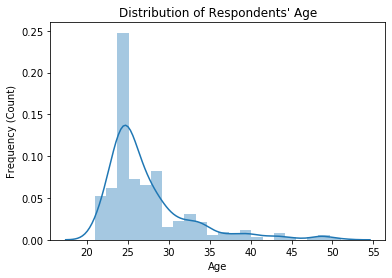

In [22]:
# Plot the histrogram of repondents' ages
plt.figure()
sns.distplot(cleaned_surveys.iloc[:, 75],
             kde = True)
plt.xlabel('Age')
plt.ylabel('Frequency (Count)')
plt.title("Distribution of Respondents' Age")

# Show the plot
plt.show()

From the age descriptive information in previous section, above histogram, and the research of age group in graduate program, we could say that the normal age range is 21-40 years. <u>Hence, ages higher than 40 will be flagged as outliers.</u>

In [23]:
# Initialize outlier column
cleaned_surveys['out_age'] = 0

# Get outliers index
index_hi = cleaned_surveys[cleaned_surveys.iloc[:, 75] > 40].index.values

# Flag as outlier
cleaned_surveys.loc[index_hi, 'out_age'] = 1

# Check the flag
#cleaned_surveys.head(5)

***
<h3>Duplicated respondents</h3>
<br>Sometimes data can include duplicate answers because of errors.<br> 
To avoid this kind of an error, we need to<br>

 - exclude surveyID, 
 - check out duplicates, 
 - and drop them. 

In [24]:
# Remove survey ID when checking if the responses are duplicated
surveys_for_dup = cleaned_surveys.drop(['surveyID'], axis = 1)

# Get duplicated row index
dup_row = surveys_for_dup.duplicated(subset=None, keep='first')
dup_row_index = surveys_for_dup[dup_row.values].index.values

# Drop duplicated responses
cleaned_surveys = cleaned_surveys.drop(dup_row_index)

***

<h3>Big Five Combination</h3>
<br> According to <a href='https://openpsychometrics.org/printable/big-five-personality-test.pdf'>Big Five personality test</a>,<br><br>
Big Five Personality Test calculated as following:

* <strong>Extroversion</strong> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= 20 + Related Questions

* <strong>Agreeableness</strong> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= 14 + Related Questions

* <strong>Conscientiousness</strong> &nbsp;&nbsp;= 14 + Related Questions

* <strong>Neuroticism</strong> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= 38 + Related Questions

* <strong>Openness</strong> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= 8 + Related Questions

<br>We applied formula to survey results. 

In [25]:
# Extroversion
cleaned_surveys['extroversion'] = 20 + cleaned_surveys.iloc[:, [1, 6, 11, 16, 21, 26, 31, 36, 41, 46]].sum(axis=1)

# Agreeableness
cleaned_surveys['agreeableness'] = 14 + cleaned_surveys.iloc[:, [2, 7, 12, 17, 22, 27, 32, 37, 42, 47]].sum(axis=1)

# Conscientiousness
cleaned_surveys['conscientiousness'] = 14 + cleaned_surveys.iloc[:, [3, 8, 13, 18, 23, 28, 33, 38, 43, 48]].sum(axis=1)

# Neuroticism
cleaned_surveys['neuroticism'] = 38 + cleaned_surveys.iloc[:, [4, 9, 14, 19, 24, 29, 34, 39, 44, 49]].sum(axis=1)

# Openness
cleaned_surveys['openness'] = 8 + cleaned_surveys.iloc[:, [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]].sum(axis=1)

***
<h3>Hult DNA Combination</h3>
<br> Hult DNA has 3 categories:

 - <strong>Thinking 
 - Communicating
 - Team Building</strong> 

We categorized Hult DNA questions according to these categories. 

 - Questions 51-55 belong to Thinking 
 - Questions 61-63 belong to Communicating 
 - Questions 63-72 belong to Team Building

In [26]:
# Thinking
cleaned_surveys['thinking'] = \
    cleaned_surveys.iloc[:, 51:55].sum(axis=1) + cleaned_surveys['avg_multitask']

# Communicating
cleaned_surveys['communicating'] = \
    cleaned_surveys.iloc[:, 61:63].sum(axis=1) + \
    cleaned_surveys.loc[:, ['avg_initiative', 'avg_open_discussion']].sum(axis=1)

# Team Building
cleaned_surveys['team_building'] = cleaned_surveys.iloc[:, 63:72].sum(axis=1)

***

<h3>Additional Adjustments</h3>
<br>For understanding and analyzing the data better, we made additional adjustments.<br>
These adjustments are following:

* By flagging the windows laptops, <strong>we devided current laptop and future laptop columns into:</strong> 
    - current_windows
    - future_windows

* <strong>Rename the columns</strong> for understand the data better. 

* <strong>Dropped unused columns.</strong>


<h4>current_windows</h4>

In [27]:
# Initialize current_windows column
cleaned_surveys['current_windows'] = 0

# Get index where current laptop is windows
index_windows = cleaned_surveys[cleaned_surveys.iloc[:, 72] == 'Windows laptop'].index.values

# Flag 
cleaned_surveys.loc[index_windows, 'current_windows'] = 1

<h4>future_windows</h4>

In [28]:
# Initialize future_windows column
cleaned_surveys['future_windows'] = 0

# Get index where future laptop is windows
index_windows = cleaned_surveys[cleaned_surveys.iloc[:, 73] == 'Windows laptop'].index.values

# Flag 
cleaned_surveys.loc[index_windows, 'future_windows'] = 1

In [29]:
#Rename the columns
cleaned_surveys.rename(
    columns = {
        'surveyID':'survey_id',
        'What laptop do you currently have?':'current_laptop',
        'What laptop would you buy in next assuming if all laptops cost the same?':'future_laptop',
        'What program are you in?':'program',
        'What is your age?':'age',
        'Gender':'gender'
    },
    inplace = True)

In [30]:
#Create new dataframe with selected columns.
featured_surveys = cleaned_surveys.loc[:, ['survey_id', 
                                           'current_laptop',
                                           'current_windows',
                                           'future_laptop',
                                           'future_windows',
                                           'program',
                                           'age', 
                                           'out_age',
                                           'gender',
                                           'region',
                                           'extroversion',
                                           'agreeableness',
                                           'conscientiousness',
                                           'neuroticism',
                                           'openness',
                                           'thinking',
                                           'communicating',
                                           'team_building']]

# Check the changes
featured_surveys.head(5)

,survey_id,current_laptop,current_windows,future_laptop,future_windows,program,age,out_age,gender,region,extroversion,agreeableness,conscientiousness,neuroticism,openness,thinking,communicating,team_building
0,a1000,Macbook,0,Macbook,0,DD (MIB & Business Analytics),25,0,Female,South America,22,25,32,21,25,14.0,9.0,30
1,a1001,Windows laptop,1,Windows laptop,1,One year Business Analytics,27,0,Male,South America,15,24,29,20,30,12.5,12.5,30
2,a1002,Windows laptop,1,Windows laptop,1,One year Business Analytics,25,0,Male,Southeast Asia,24,16,29,33,23,14.0,6.0,26
3,a1003,Windows laptop,1,Windows laptop,1,One year Business Analytics,26,0,Female,Southeast Asia,18,32,22,20,29,12.5,10.5,33
5,a1005,Macbook,0,Macbook,0,DD (MIB & Business Analytics),22,0,Male,Southeast Asia,14,29,18,11,23,13.0,6.0,26


***
***
<h2>Step III: Modeling</h2>
<br>

 - Principal Component Analysis focuses on the variance between explanatory variables (i.e. their covariance).
 - Agglomerative clustering starts where each observation is its own cluster. From there, it links observations based on distance. 


***
<h3>Normalization</h3>

In [31]:
# Scale (normalizing) variables before correlation analysis

# Drop demographic information
personality_traits = featured_surveys.drop(['survey_id',
                                            'current_laptop',
                                            'future_laptop',
                                            'program',
                                            'age',
                                            'gender',
                                            'region',
                                            'out_age',
                                            'current_windows', 
                                            'future_windows'],
                                           axis = 1)

# Instantiate a StandardScaler() object
scaler = StandardScaler()

# Fit and transform the scaler with the data
X_scaled = scaler.fit_transform(personality_traits)

# Convert scaled data into a DataFrame
traits_scaled = pd.DataFrame(X_scaled)

# Reattach column names
traits_scaled.columns = personality_traits.columns

# Check pre- and post-scaling variance
# print(pd.np.var(personality_traits), '\n\n')
# print(pd.np.var(traits_scaled))

<h3>Correlation</h3>

In [32]:
print("Top Absolute Correlations")
get_top_abs_correlations(traits_scaled)

Top Absolute Correlations


thinking       communicating    0.619536
communicating  team_building    0.602264
thinking       team_building    0.588361
openness       thinking         0.546417
dtype: float64

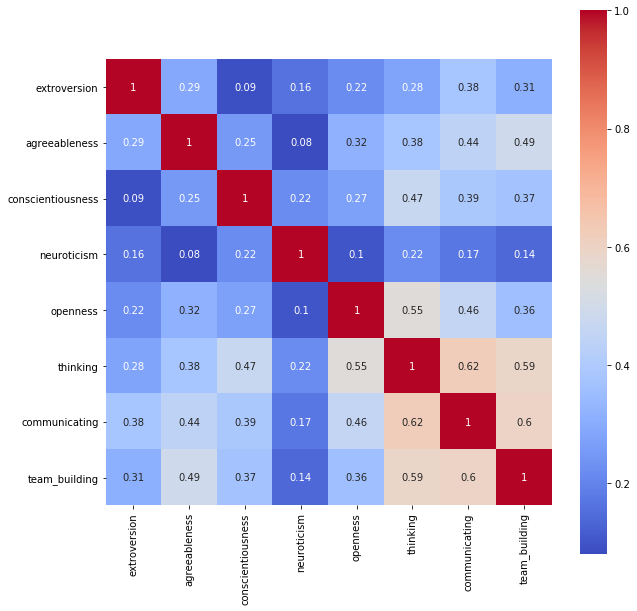

In [33]:
# setting plot size
fig, ax = plt.subplots(figsize = (10, 10))


# developing a correlation matrix object
df_corr = traits_scaled.corr().round(2)


# creating a correlation heatmap
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True)


# saving and displaying the heatmap
plt.show()

Notice that only a few (Pearson) correlations have an absolute value above 0.50. This makes the dataset a good candidate for PCA. As such, we may be able to explain a high degree of variance with a small number of principal components.

***

<h3> Principal Component Analysis</h3>

Our process here is to:
1. Develop a PCA model with no limit to principal components
2. Analyze the <strong>explained_variance_ratio</strong> and the <strong>scree plot</strong>
3. Decide how many components to retain
4. Build a new model with a limited number of principal components
5. Interpret our results (what does each type represent)

<h4>PCA Model with No Limit</h4><br>
Instantiate a PCA object with no limit to principal components

In [34]:
# Instantiate a PCA object with no limit to principal components
pca = PCA(n_components = None,
            random_state = 222)

# Fit and transform the scaled data
traits_pca = pca.fit_transform(traits_scaled)

# comparing dimensions of each DataFrame
# print("Original shape:", traits_scaled.shape)
# print("PCA shape     :", traits_pca.shape)

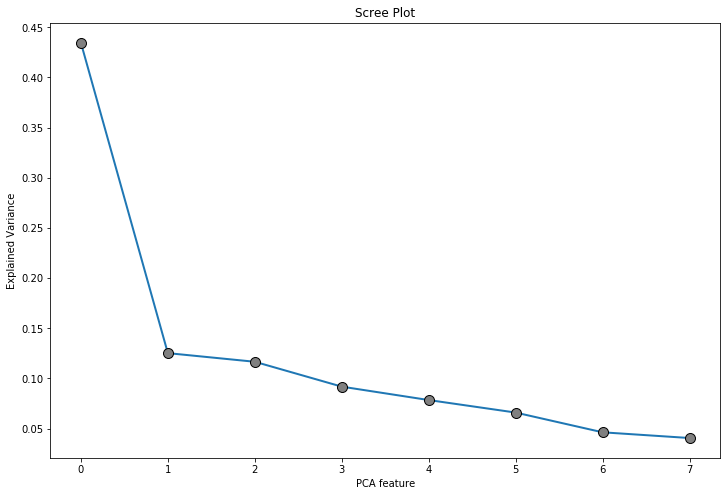

In [35]:
# calling the scree_plot function
scree_plot(pca)

<br><br> Based on the elbow in the scree plot determinate reasonable number of principal components, we instantiated a new model by <strong>using the first two principal components.</strong>

<h4>PCA Model with 2 Principal Components</h4>

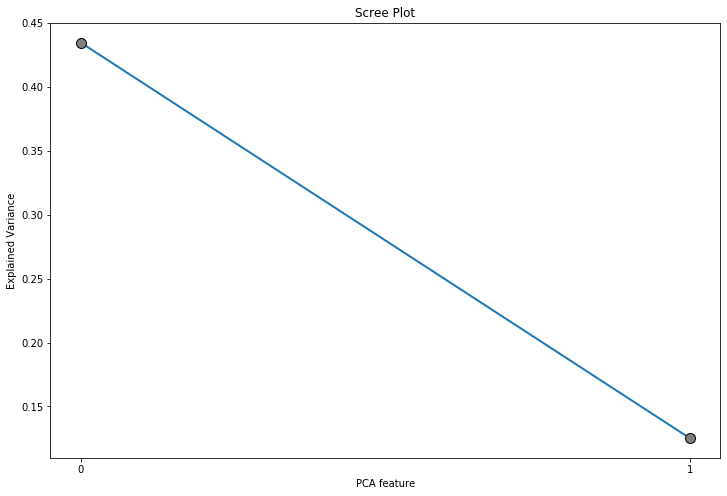

In [36]:
# Instantiate a new model using the first two principal components
pca_2 = PCA(n_components = 2,
            random_state = 222)

# Fit and transform the scaled data
traits_pca_2 = pca_2.fit_transform(traits_scaled)

X_pca_df = pd.DataFrame(traits_pca_2)

# calling the scree_plot function
scree_plot(pca_object = pca_2)

<strong>Name Principal Components</strong>
<br>Develop name for each PC by developing story behind them. 

<br><strong>Type I:</strong> Cautious, Careless, Analytical/Detached, 'tell it like it is'
<br><strong>Type II:</strong> Secure/Confident, Careless, Friendly/Compassionate, Very social ,  Polite and like people

In [37]:
# Transpose pca components (pc = 2)
factor_loadings_2 = pd.DataFrame(pd.np.transpose(pca_2.components_))

# Name rows as original features
factor_loadings_2 = factor_loadings_2.set_index(traits_scaled.columns)

factor_loadings_2.columns = ['Type_I', 'Type_II']

print(f"""
2 Components Factor Loadings
------------------------------
{factor_loadings_2.round(2)}
""")


2 Components Factor Loadings
------------------------------
                   Type_I  Type_II
extroversion        -0.26     0.23
agreeableness       -0.34     0.31
conscientiousness   -0.31    -0.42
neuroticism         -0.17    -0.80
openness            -0.35     0.11
thinking            -0.44    -0.08
communicating       -0.44     0.10
team_building       -0.42     0.12



***
<h3>Agglomerative Clustering</h3>

<h4>Rescaling the Data</h4>

In [38]:
# Instantiate a StandardScaler() object
scaler = StandardScaler()

# Fit and transform the scaler with the data
X_scaled = scaler.fit_transform(X_pca_df)

# Convert scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled)

# Reattach column names
pca_scaled.columns = factor_loadings_2.columns

# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df), '\n')
print(pd.np.var(pca_scaled))

0    3.476718
1    1.002148
dtype: float64 

Type_I     1.0
Type_II    1.0
dtype: float64


<h4>Dendrogram</h4><br>
<strong>Develop a Dendrogram</strong> to understand how many clusters to build using k-Mean.<br>
(In order to save computational power, we commented out graphic plot code.)

In [39]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward')

# # setting plot size
# fig, ax = plt.subplots(figsize=(40, 30))

# # developing a dendrogram
# dendrogram(Z = standard_mergings_ward,
#            leaf_rotation = 90,
#            leaf_font_size = 6)

# # saving and displaying the plot
# plt.show()

<h4>Inertia Graph</h4>

<strong>Plot inertia graph</strong> to develop more candidates for the number of clusters we might want to develop.

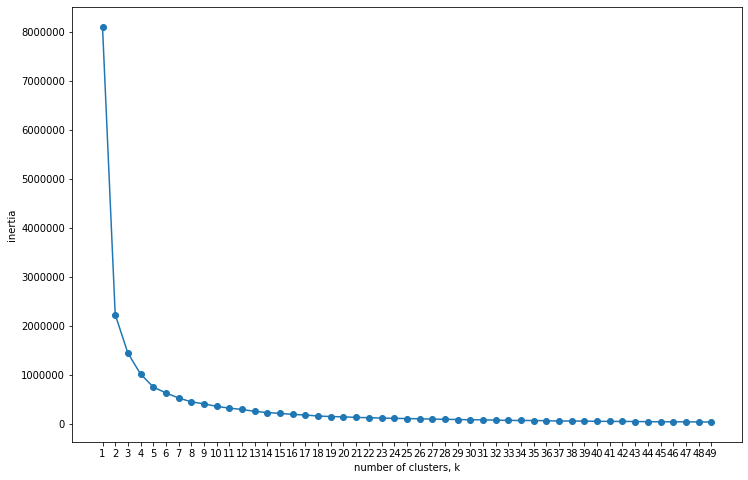

In [40]:
# Plot inertia graph
inertia_plot(standard_mergings_ward)

<br><br>According to inertia plot elbow equal to 4. We applied result to number of principal components. 

<h4>k-Means</h4>

In [41]:
# Instantiate a k-Means object
traits_k_pca = KMeans(n_clusters = 4,
                      random_state = 222)

# Fit the object to the data
traits_k_pca.fit(pca_scaled)

# Convert the clusters to a DataFrame
traits_kmeans_pca = pd.DataFrame({'Cluster': traits_k_pca.labels_})

# Check the results
print(traits_kmeans_pca.iloc[: , 0].value_counts())

3    78
0    60
2    52
1    48
Name: Cluster, dtype: int64


According to the inertia graph, we believe 4 clusters are reasonable in this case. 

In [42]:
# Store cluster centers
centroids_pca = traits_k_pca.cluster_centers_

# Convert cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)

# Rename principal components
centroids_pca_df.columns = factor_loadings_2.columns

# Check results (clusters = rows, pc = columns)
#centroids_pca_df.round(2)

<h4>Combining Cluster, PCA, and Demographic All Together</h4>

In [43]:
# Concatinate cluster memberships with principal components
clst_pca_df = pd.concat([traits_kmeans_pca,  X_pca_df.round(2)],
                        axis = 1)

# Get demographic columns
demo_df = featured_surveys.loc[ : , ['current_laptop', 
                                     'future_laptop', 
                                     'gender', 
                                     'region', 
                                     'program', 
                                     'age', 
                                     'out_age']]

# Reset row index before concat, otherwise it will concat with old index,
# causing null
clst_pca_df.reset_index(drop=True, inplace=True)
demo_df.reset_index(drop=True, inplace=True)

# Concatenate demographic information with pca-clusters
final_pca_clust_df = pd.concat(
    [demo_df, clst_pca_df],
    axis = 1, 
    ignore_index=True)

# Rename columns
final_pca_clust_df.columns = ['current_laptop', 
                              'future_laptop',
                              'gender',
                              'region',
                              'program',
                              'age', 
                              'out_age',
                              'Cluster', 
                              'Type_I', 
                              'Type_II']

# checking the results
#final_pca_clust_df.head(n = 10)

<h4>Renaming Clusters & Age Group</h4>

In [44]:
# Renaming cluster
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4'}

final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)

# Renaming age
age_name = { 0 : 'Lower than 40',
             1 : 'Higher than 40'}

final_pca_clust_df['out_age'].replace(age_name, inplace = True)

final_pca_clust_df.head(5)

,current_laptop,future_laptop,gender,region,program,age,out_age,Cluster,Type_I,Type_II
0,Macbook,Macbook,Female,South America,DD (MIB & Business Analytics),25,Lower than 40,Cluster 4,-0.04,-0.44
1,Windows laptop,Windows laptop,Male,South America,One year Business Analytics,27,Lower than 40,Cluster 4,-0.33,-0.08
2,Windows laptop,Windows laptop,Male,Southeast Asia,One year Business Analytics,25,Lower than 40,Cluster 1,1.47,-2.34
3,Windows laptop,Windows laptop,Female,Southeast Asia,One year Business Analytics,26,Lower than 40,Cluster 3,-0.35,0.96
4,Macbook,Macbook,Male,Southeast Asia,DD (MIB & Business Analytics),22,Lower than 40,Cluster 3,2.36,1.45


***
***
<h2>Step IV: Analyze with Demographics</h2>

Now that we've completed all of our preparation through machine learning, we can analyze our results with demographics and other data.

According to our data, here is how our cluster looks like.</strong>

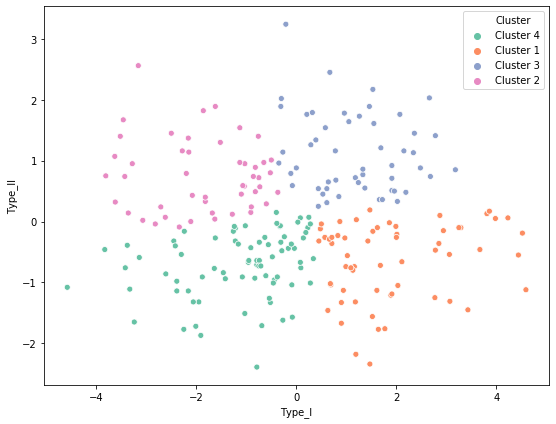

In [45]:
# Plot scatter plot of cluster's factor
fig, ax = plt.subplots(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x = 'Type_I',
                y = 'Type_II',
                hue = 'Cluster',
                palette = 'Set2',
                data = final_pca_clust_df)

plt.tight_layout()
plt.show()

We can see that even though tour clusters are neatly separated, they are very closed to each other. One new point that has a small different in factors could lead to be grouped into different cluster.

Nevertheless, 
* **Type I** is defined as disliking changing and resisting new ideas, having no interest in others, disliking structures and deadlines, and preferring solitude, liking anti-socializing. Furthermore, they are negatively related to thinking, communicating and team building.
* **Type II**personalities enjoy socializing, love to be in the center of attention, care for others, feel empathy, dislike structure and deadlines, be emotionally stable, deal with stress successfully, open to new ideas, and be good at thinking and communication and team building.

<table class='question_list' style='width:50%'>
    <tr>
        <th>Cluster</th>
        <th>Type I</th>
        <th>Type II</th>
    </tr>
    <tr>
        <td>1</td>
        <td>High</td>
        <td>Low</td>
    </tr>
    <tr>
        <td>2</td>
        <td>Low</td>
        <td>High</td>
    </tr>
    <tr>
        <td>3</td>
        <td>High</td>
        <td>High</td>
    </tr>
    <tr>
        <td>4</td>
        <td>Low</td>
        <td>Low</td>
    </tr>
</table>

According to the characteristic of our cluster, we analyzed current_laptop, future_laptop, gender and program.

<br><strong>Current Laptop</strong>

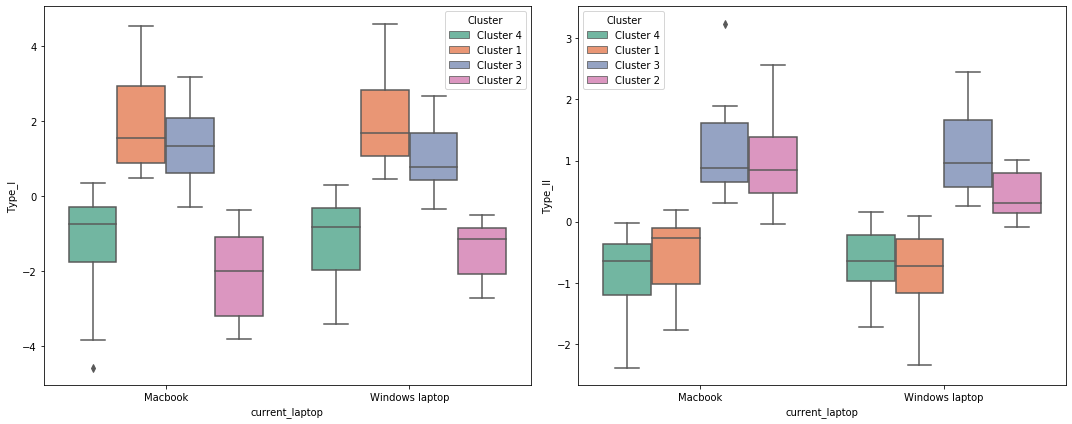

In [46]:
#Current Laptop
fig, ax = plt.subplots(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'current_laptop',
            y = 'Type_I',
            hue = 'Cluster',
            palette = 'Set2',
            data = final_pca_clust_df)

plt.subplot(1, 2, 2)
sns.boxplot(x = 'current_laptop',
            y = 'Type_II',
            hue = 'Cluster',
            palette = 'Set2',
            data = final_pca_clust_df)

plt.tight_layout()
plt.show()

<br><strong>Future Laptop</strong>

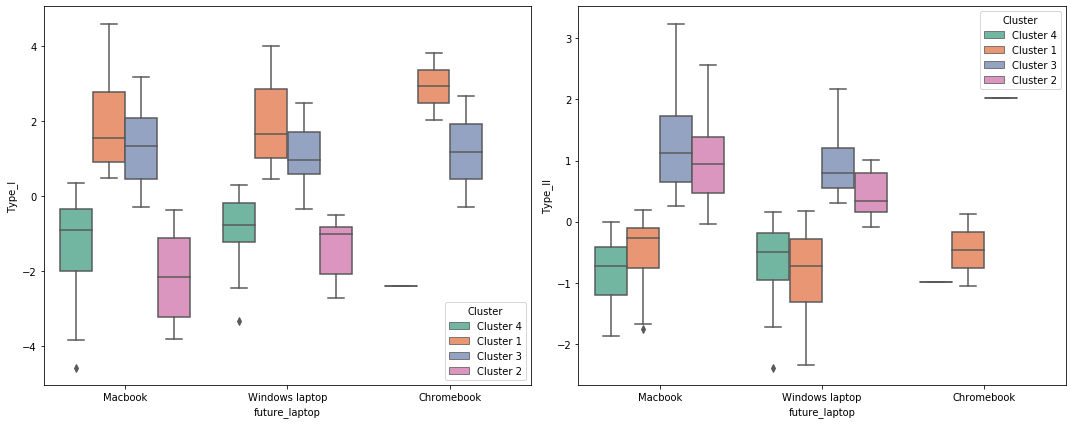

In [47]:
#Future Laptop
fig, ax = plt.subplots(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'future_laptop',
            y = 'Type_I',
            hue = 'Cluster',
            palette = 'Set2',
            data = final_pca_clust_df)

plt.subplot(1, 2, 2)
sns.boxplot(x = 'future_laptop',
            y = 'Type_II',
            hue = 'Cluster',
            palette = 'Set2',
            data = final_pca_clust_df)

plt.tight_layout()
plt.show()

<br><strong>Change</strong>

In [48]:
tmp_df = final_pca_clust_df.copy()
tmp_df['change'] = tmp_df['current_laptop'] != tmp_df['future_laptop']

tmp_df.loc[:, ['Cluster', 'change']].groupby(['Cluster', 'change']).size()

Cluster    change
Cluster 1  False     49
           True      11
Cluster 2  False     47
           True       1
Cluster 3  False     40
           True      12
Cluster 4  False     65
           True      13
dtype: int64

~~~
    Cluster   Change Ratio
    1         0.18
    2         0.02
    3         0.23
    4         0.16
~~~

<strong>Interpretation</strong> 
<br>For current and future laptop preferences, clusters acting similar however Cluster 1 and 3's that both have higher value in Type I, shows higher rate of change.
<br><br>

<br><strong>Gender</strong>

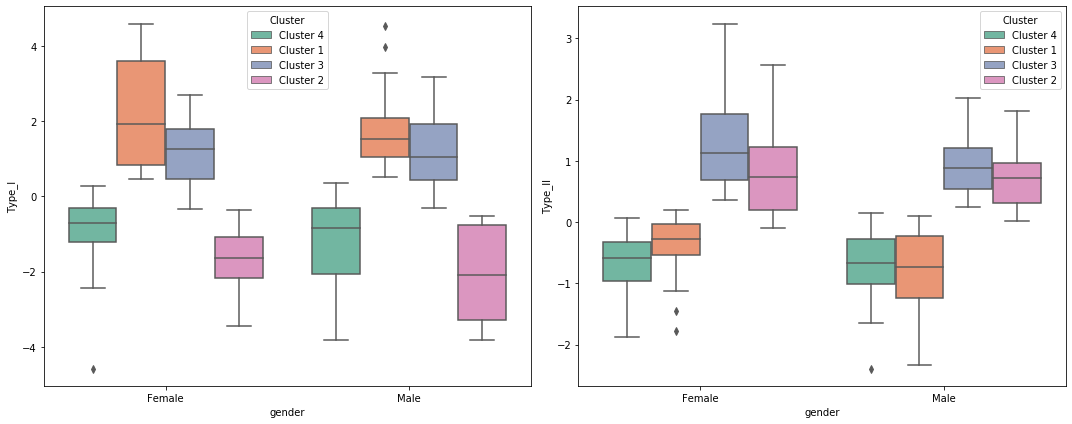

In [49]:
#Gender
fig, ax = plt.subplots(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'gender',
            y = 'Type_I',
            hue = 'Cluster',
            palette = 'Set2',
            data = final_pca_clust_df)

plt.subplot(1, 2, 2)
sns.boxplot(x = 'gender',
            y = 'Type_II',
            hue = 'Cluster',
            palette = 'Set2',
            data = final_pca_clust_df)

plt.tight_layout()
plt.show()

<strong>Interpretation</strong><br>
There is no change between Type's according to their genders. Both Type's act similar for both gender. 
<br><br>
<br><strong>Program</strong>

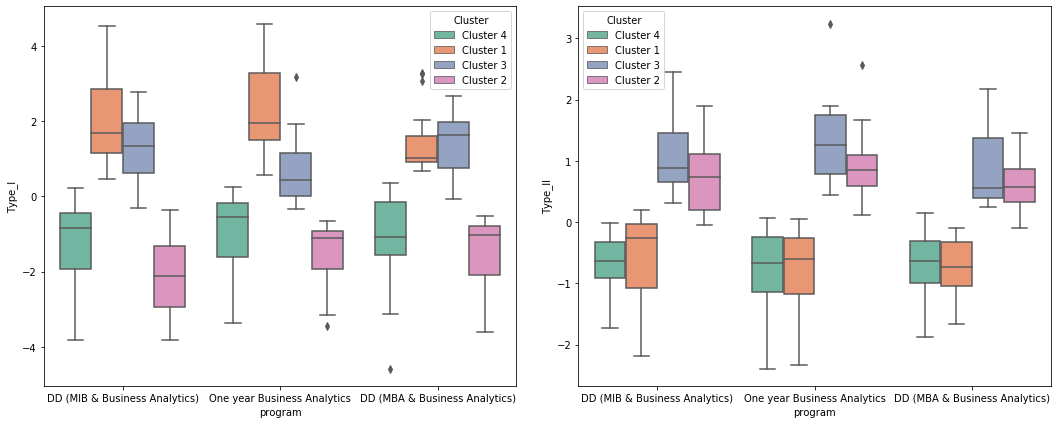

In [50]:
#Program
fig, ax = plt.subplots(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'program',
            y = 'Type_I',
            hue = 'Cluster',
            palette = 'Set2',
            data = final_pca_clust_df)

plt.subplot(1, 2, 2)
sns.boxplot(x = 'program',
            y = 'Type_II',
            hue = 'Cluster',
            palette = 'Set2',
            data = final_pca_clust_df)

plt.tight_layout()
plt.show()

<strong>Interpretation</strong><br>
For both Type, students who enrolled in DD (MBA & Business Analytics) program have different results. 
<br><br>
<br><strong>Age</strong>

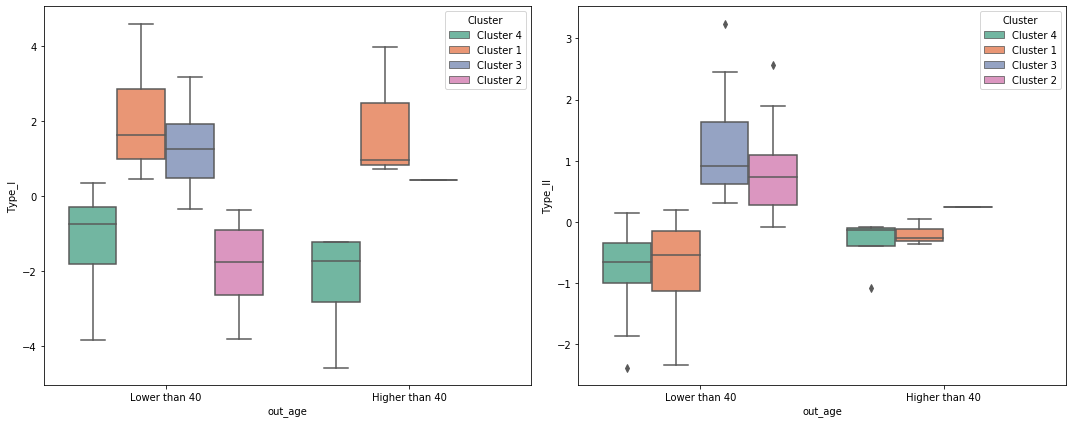

In [51]:
# Age
fig, ax = plt.subplots(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'out_age',
            y = 'Type_I',
            hue = 'Cluster',
            palette = 'Set2',
            data = final_pca_clust_df)

plt.subplot(1, 2, 2)
sns.boxplot(x = 'out_age',
            y = 'Type_II',
            hue = 'Cluster',
            palette = 'Set2',
            data = final_pca_clust_df)

plt.tight_layout()
plt.show()

<strong>Interpretation</strong><br>
Both Type I and II are affected by age. Age higher than 40 could lower or raise the score. However, since we have quite small sample size (as we can see that cluster doesn't even have a respondent over than 40 years old), we don't want to conclude that it will definitely lower or higher the scores.

<h2>Conclusion</h2>
<br>
We have analyzed this business case. The business objective was to find the relations between customers' personalities and purchasing future laptops for Microsoft. With the given the data, we used <strong>five steps</strong> to analyze the data and came up with some insights. 
<br>

First of all, these are the five steps: <u>packages and environment setup</u>, <u>data exploration</u>, <u>data cleaning</u>, <u>appropriate modeling techniques</u>,and <u>analyze with demographics</u>. 

Secondly, we found some issues during data exploration and data cleaning. For instance, there were duplicated observations. Some invalid entries appeared, and we decided to delete them. Furthermore, we combined the survey questions into <strong>three groups</strong>. They are Big Five Personality Test questions, Hult DNA questions, and demographic questions. In this way, we believed that it would help us to PCA model.

Thirdly, we applied the featured dataset into unsupervised algorithms. We, firstly, used PCA model to generate principle components, and then we used PCA model to apply k-Means clusters. We found out that 4 clusters are reasonable.

Finally, we analyzed the models and generated some insights.